# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.152138e+01     7.184573e+00
 * time: 0.004940986633300781
     1     3.021635e+01     7.331109e+00
 * time: 0.014521121978759766
     2     1.652673e+01     4.206247e+00
 * time: 0.042797088623046875
     3     1.296504e+01     1.805379e+00
 * time: 0.06624102592468262
     4     1.142994e+01     2.116493e+00
 * time: 0.09044814109802246
     5     1.033697e+01     2.662177e+00
 * time: 0.10804104804992676
     6     9.658495e+00     1.061124e+00
 * time: 0.12540507316589355
     7     9.322864e+00     7.796285e-01
 * time: 0.14421319961547852
     8     9.129746e+00     7.671872e-01
 * time: 0.1620650291442871
     9     9.018135e+00     3.623665e-01
 * time: 0.18027710914611816
    10     8.954303e+00     3.541968e-01
 * time: 0.19772005081176758
    11     8.907859e+00     1.033048e+00
 * time: 0.21168208122253418
    12     8.857206e+00     4.865429e-01
 * time: 0.23089313507080078
    13     8.829839e+00     6.321045e-01
 * tim

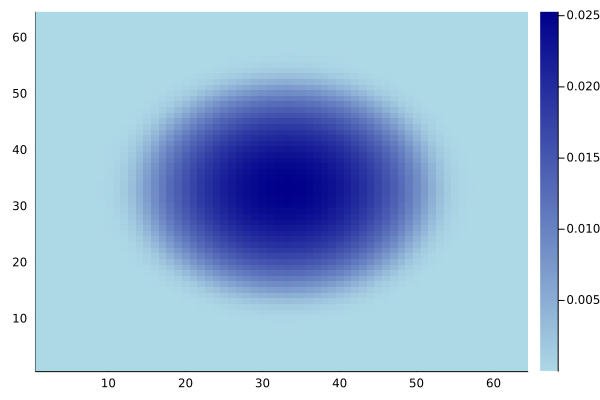

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)